## Project Term Deposit

#### Cleaning Dataset

![Alt Text](deposit_variables.png)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [2]:
deposit = pd.read_csv("deposit.csv")
deposit

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
deposit.drop("Id", axis = 1, inplace = True)
deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45202 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45208 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 5.9+ MB


In [4]:
print(deposit.isna().sum())

age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [5]:
deposit = deposit.dropna()
deposit.count()

age          45200
job          45200
marital      45200
education    45200
default      45200
balance      45200
housing      45200
loan         45200
contact      45200
day          45200
month        45200
duration     45200
campaign     45200
pdays        45200
previous     45200
poutcome     45200
y            45200
dtype: int64

In [6]:
x, y = deposit.shape
print(f"There are {x} rows and {y} columns")

There are 45200 rows and 17 columns


In [7]:
deposit.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000
mean,40.954292,1362.565686,15.809049,258.141637,2.764270,40.207854,0.580465
std,11.539117,3045.076372,8.321781,257.438318,3.098276,100.138866,2.303704
min,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,449.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# target --> unbalanced
deposit["y"].value_counts()

y
no     39911
yes     5289
Name: count, dtype: int64

Variable Age

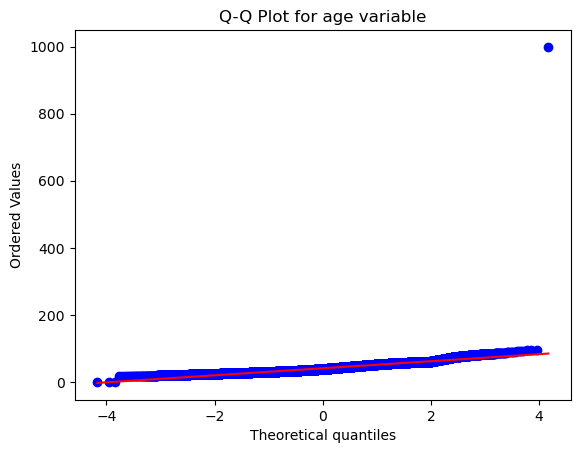

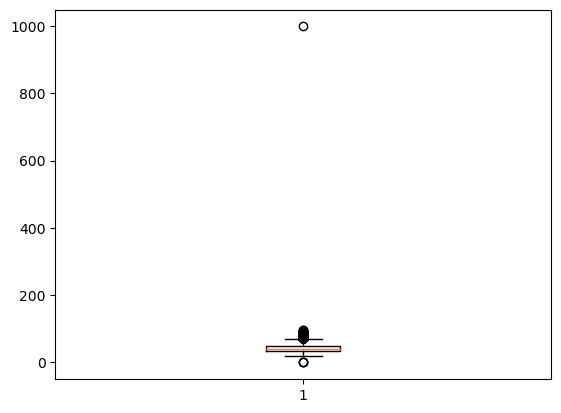

<Figure size 1000x700 with 0 Axes>

15.0 70.5 10.5
(45200, 17)
(44710, 17)


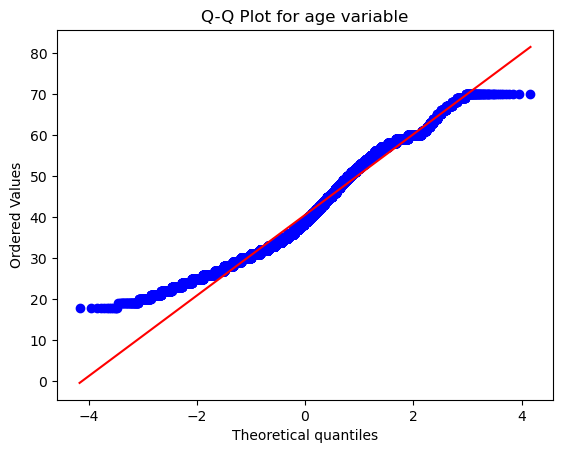

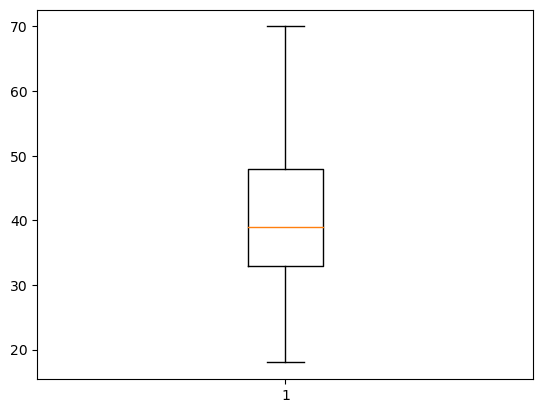

<Figure size 1000x700 with 0 Axes>

In [9]:
# Q-Q Plot
stats.probplot(deposit["age"], dist="norm", plot=plt)
plt.title("Q-Q Plot for age variable")
plt.show()

# Box-Plot
plt.boxplot(deposit["age"])
figure = plt.figure(figsize = (10, 7))
plt.show()

q1 = np.quantile(deposit["age"], 0.25)
q3 = np.quantile(deposit["age"], 0.75)
med = np.median(deposit["age"])
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)
print(iqr, upper_bound, lower_bound)

deposit1 = deposit[(deposit["age"] > lower_bound) & (deposit["age"] < upper_bound)]
print(deposit.shape)
print(deposit1.shape)

stats.probplot(deposit1["age"], dist="norm", plot=plt)
plt.title("Q-Q Plot for age variable")
plt.show()

plt.boxplot(deposit1["age"])
figure = plt.figure(figsize = (10, 7))
plt.show()

Variable Balance

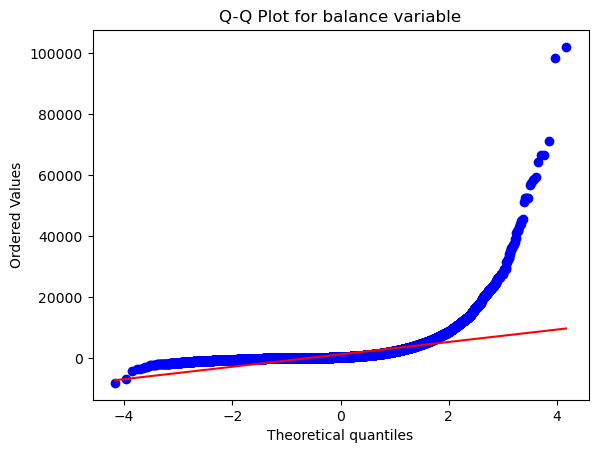

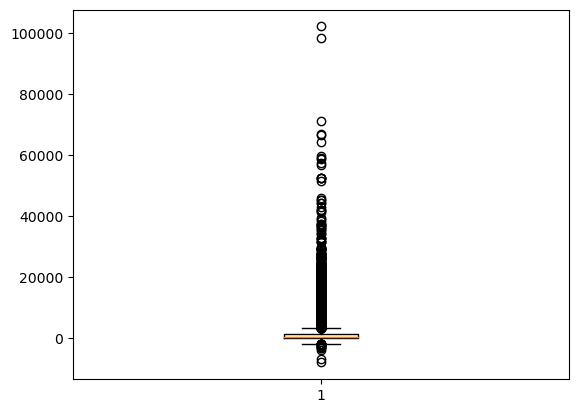

<Figure size 1000x700 with 0 Axes>

1337.0 3413.5 -1934.5
(44710, 17)
(40014, 17)


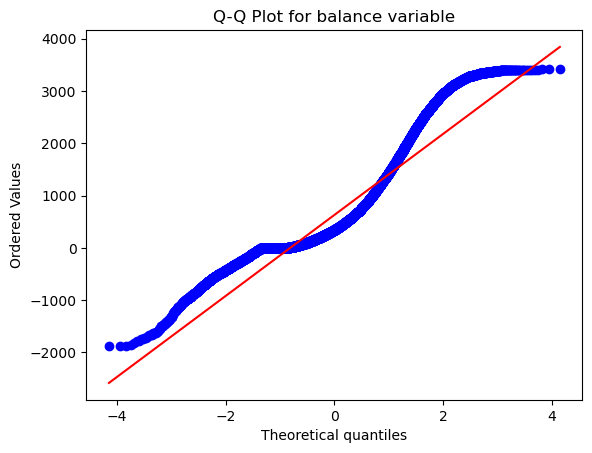

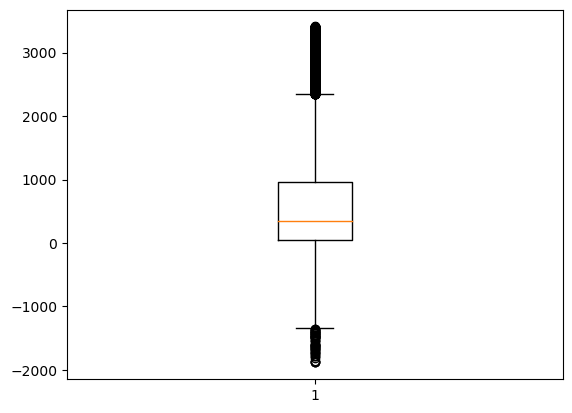

<Figure size 1000x700 with 0 Axes>

In [10]:
# Q-Q Plot
stats.probplot(deposit1["balance"], dist="norm", plot=plt)
plt.title("Q-Q Plot for balance variable")
plt.show()

# Box-Plot
plt.boxplot(deposit1["balance"])
figure = plt.figure(figsize = (10, 7))
plt.show()

q1 = np.quantile(deposit1["balance"], 0.25)
q3 = np.quantile(deposit1["balance"], 0.75)
med = np.median(deposit1["balance"])
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)
print(iqr, upper_bound, lower_bound)

deposit2 = deposit1[(deposit1["balance"] > lower_bound) & (deposit1["balance"] < upper_bound)]
print(deposit1.shape)
print(deposit2.shape)

stats.probplot(deposit2["balance"], dist="norm", plot=plt)
plt.title("Q-Q Plot for balance variable")
plt.show()

plt.boxplot(deposit2["balance"])
figure = plt.figure(figsize = (10, 7))
plt.show()

Variable Duration

"Duration" is discarded because it represents post-call information unavailable at prediction time, violating the principle of predictive modeling and introducing data leakage.

In [11]:
deposit2.drop(columns=["duration"], inplace=True)
print(deposit2.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')


/var/folders/f9/c58y0kq13x3byft7fk0g0htw0000gn/T/ipykernel_93572/2609264968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deposit2.drop(columns=["duration"], inplace=True)


Campaign Variable

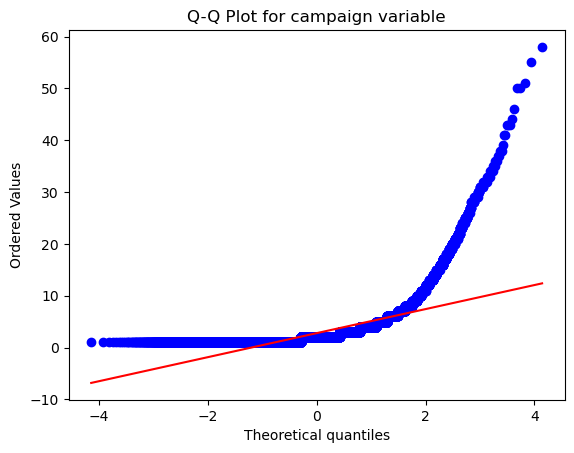

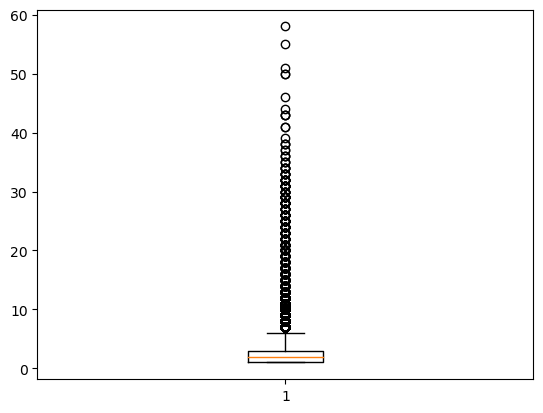

<Figure size 1000x700 with 0 Axes>

In [12]:
# Q-Q Plot
stats.probplot(deposit2["campaign"], dist="norm", plot=plt)
plt.title("Q-Q Plot for campaign variable")
plt.show()

# Box-Plot
plt.boxplot(deposit2["campaign"])
figure = plt.figure(figsize = (10, 7))
plt.show()

Pdays Variable

We have to treat the feature by using label encoding to transform the values

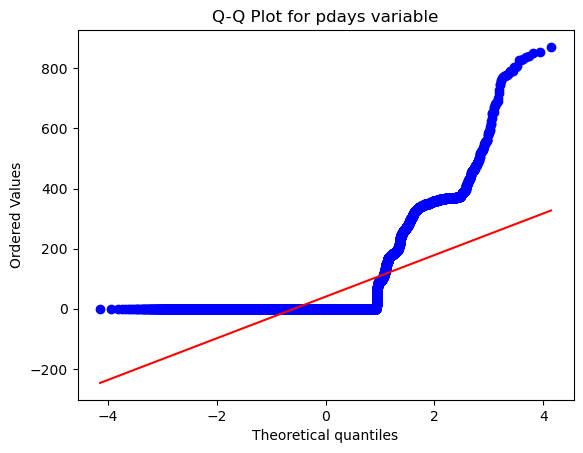

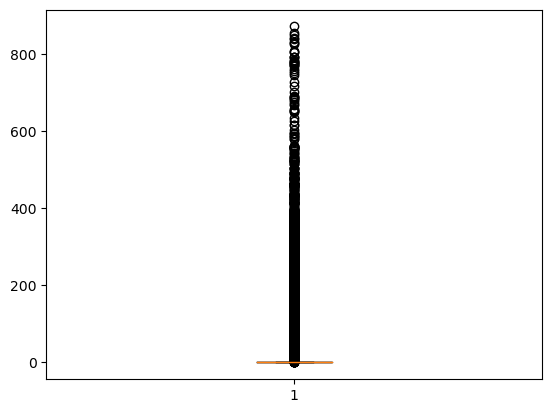

<Figure size 1000x700 with 0 Axes>

/var/folders/f9/c58y0kq13x3byft7fk0g0htw0000gn/T/ipykernel_93572/157273872.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deposit2["pdays"] = deposit2["pdays"].replace(-1, 0)
/var/folders/f9/c58y0kq13x3byft7fk0g0htw0000gn/T/ipykernel_93572/157273872.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deposit2["pdays"] = pd.to_numeric(deposit2["pdays"], errors="coerce")


(40014, 16)

In [13]:
# Q-Q Plot
stats.probplot(deposit2["pdays"], dist="norm", plot=plt)
plt.title("Q-Q Plot for pdays variable")
plt.show()

# Box-Plot
plt.boxplot(deposit2["pdays"])
figure = plt.figure(figsize = (10, 7))
plt.show()

deposit2["pdays"] = deposit2["pdays"].replace(-1, 0)
deposit2["pdays"] = pd.to_numeric(deposit2["pdays"], errors="coerce")

deposit2.shape

Previous Variable

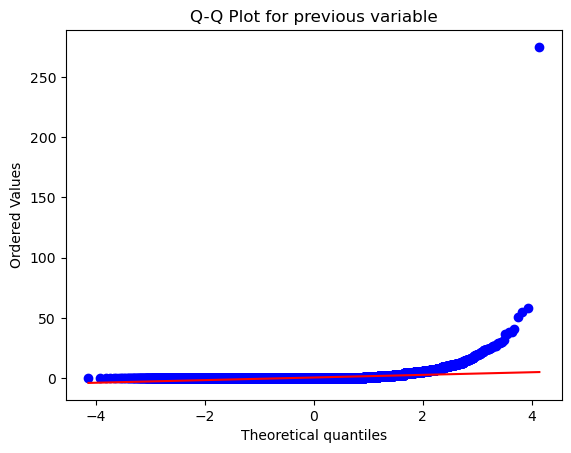

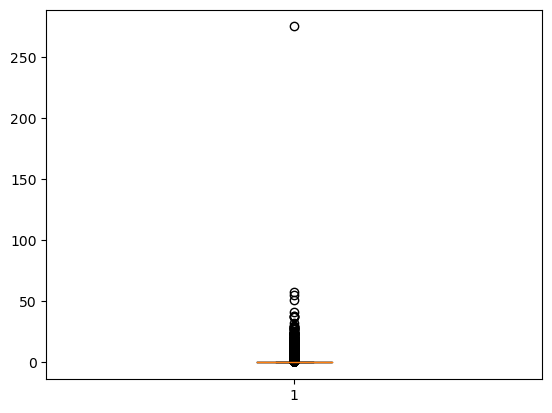

<Figure size 1000x700 with 0 Axes>

(40014, 16)
(40002, 16)


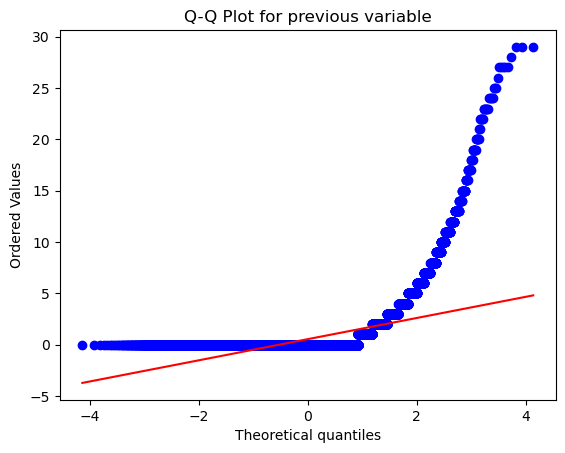

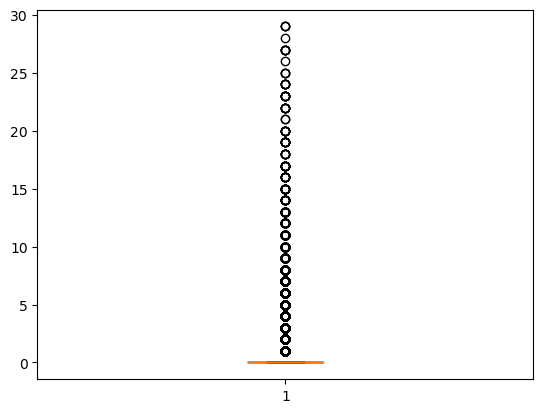

<Figure size 1000x700 with 0 Axes>

In [14]:
# Q-Q Plot
stats.probplot(deposit2["previous"], dist="norm", plot=plt)
plt.title("Q-Q Plot for previous variable")
plt.show()

# Box-Plot
plt.boxplot(deposit2["previous"])
figure = plt.figure(figsize = (10, 7))
plt.show()

deposit3 = deposit2[(deposit2["previous"] >= 0) & (deposit2["previous"] < 30)] #30 chosen by graphical inspection
print(deposit2.shape)
print(deposit3.shape)

stats.probplot(deposit3["previous"], dist="norm", plot=plt)
plt.title("Q-Q Plot for previous variable")
plt.show()

plt.boxplot(deposit3["previous"])
figure = plt.figure(figsize = (10, 7))
plt.show()

Categorical Variables

In [15]:
# just to show the distribution of values inside each variable
print(
    deposit3["job"].value_counts(), 
    "\n\n",
    deposit3["marital"].value_counts(), 
    "\n\n",
    deposit3["education"].value_counts(),
    "\n\n",
    deposit3["default"].value_counts(), 
    "\n\n",
    deposit3["housing"].value_counts(), 
    "\n\n",
    deposit3["loan"].value_counts(),
    "\n\n",
    deposit3["contact"].value_counts(), 
    "\n\n",
    deposit3["poutcome"].value_counts()      
)

job
blue-collar      8928
management       8107
technician       6828
admin.           4711
services         3837
retired          1571
self-employed    1384
entrepreneur     1330
unemployed       1148
housemaid        1081
student           836
unknown           241
Name: count, dtype: int64 

 marital
married     23858
single      11499
divorced     4645
Name: count, dtype: int64 

 education
secondary    21062
tertiary     11381
primary       5969
unknown       1590
Name: count, dtype: int64 

 default
no     39202
yes      800
Name: count, dtype: int64 

 housing
yes    22788
no     17214
Name: count, dtype: int64 

 loan
no     33172
yes     6830
Name: count, dtype: int64 

 contact
cellular     25867
unknown      11814
telephone     2321
Name: count, dtype: int64 

 poutcome
unknown    32905
failure     4270
other       1605
success     1222
Name: count, dtype: int64


### Correlation Matrix

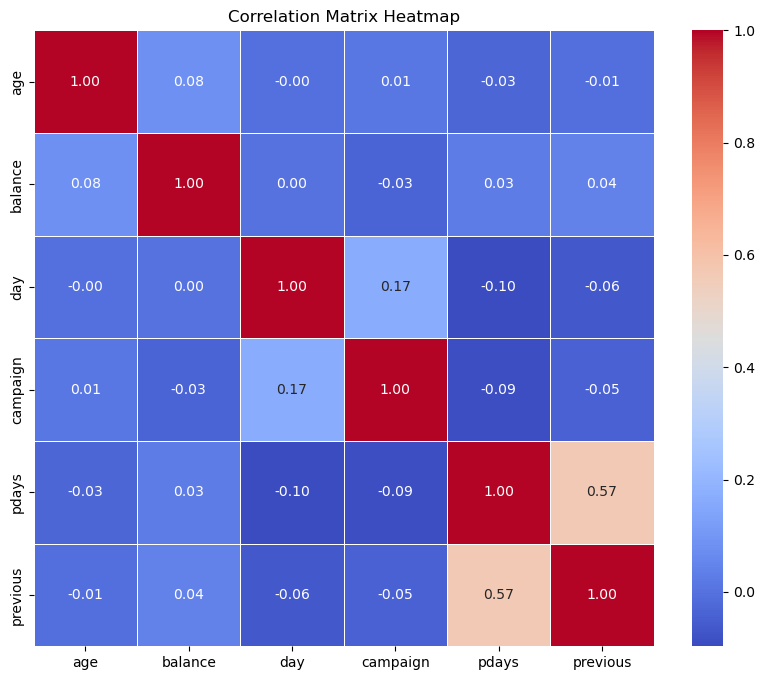

In [16]:
# Load the dataset
data=deposit3

data1=data.loc[:, ['age', 'balance', 'day','campaign','pdays','previous']]

# Compute the correlation matrix
correlation_matrix = data1.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

### Histogram (numerical data)

In [17]:
# Load the dataset and include the 'y' column
# Load the dataset
data=deposit3

data2=data.loc[:, ['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'y']]

# Print the cleaned dataset
print(data2.head())
print(f"Dataset shape after outlier removal: {data.shape}")

    age  balance  day  campaign  pdays  previous   y
1  44.0     29.0    5         1      0         0  no
2  33.0      2.0    5         1      0         0  no
3  47.0   1506.0    5         1      0         0  no
4  33.0      1.0    5         1      0         0  no
5  35.0    231.0    5         1      0         0  no
Dataset shape after outlier removal: (40002, 16)


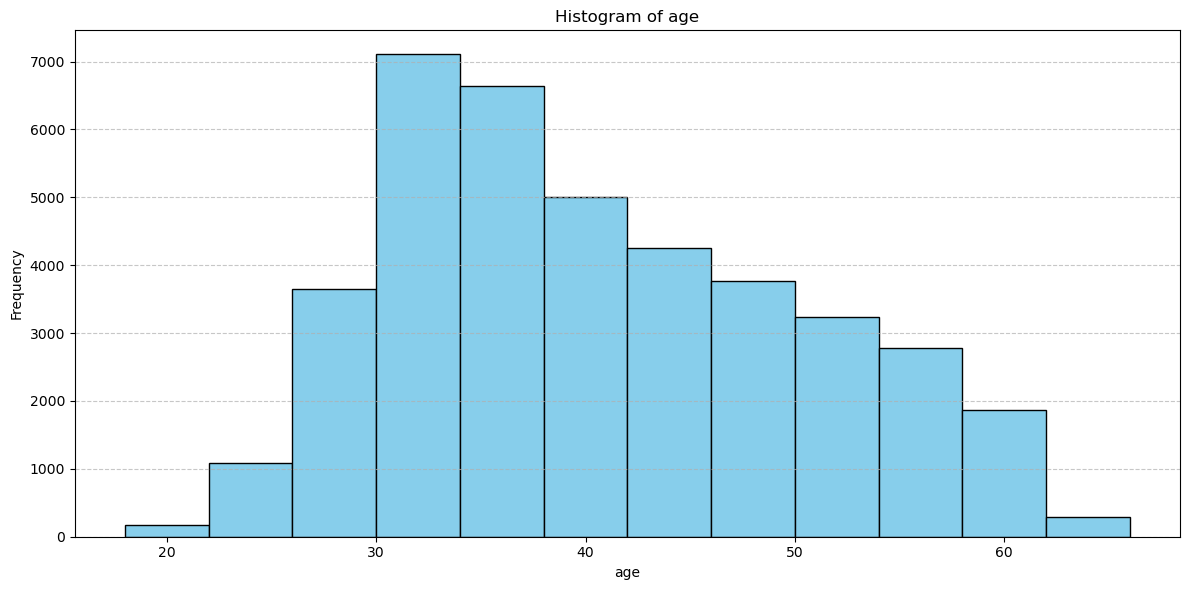

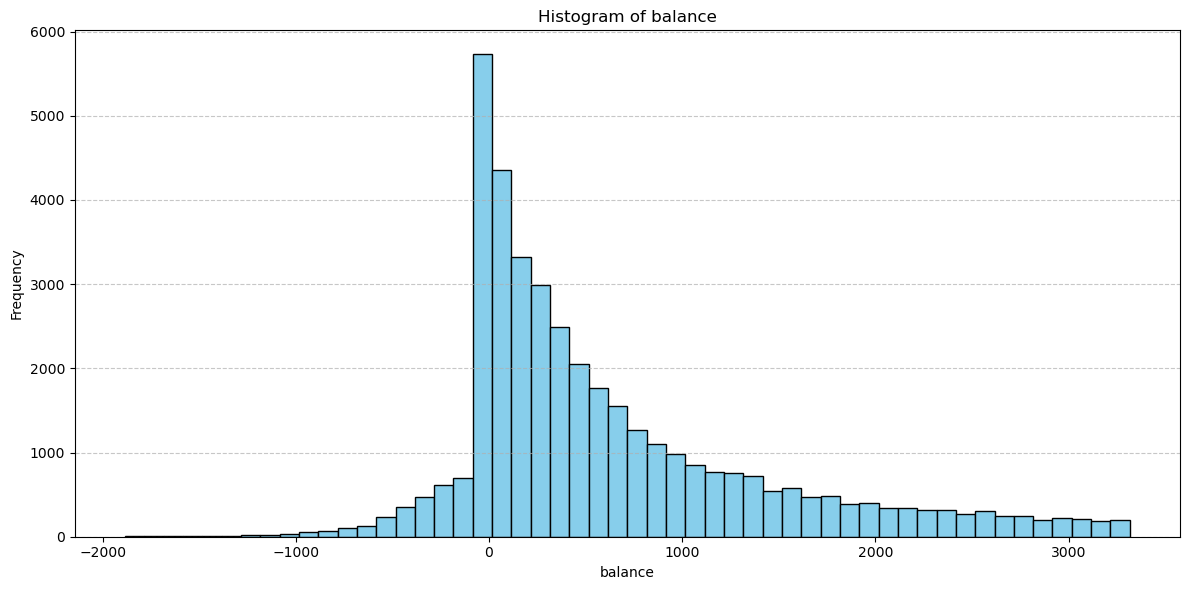

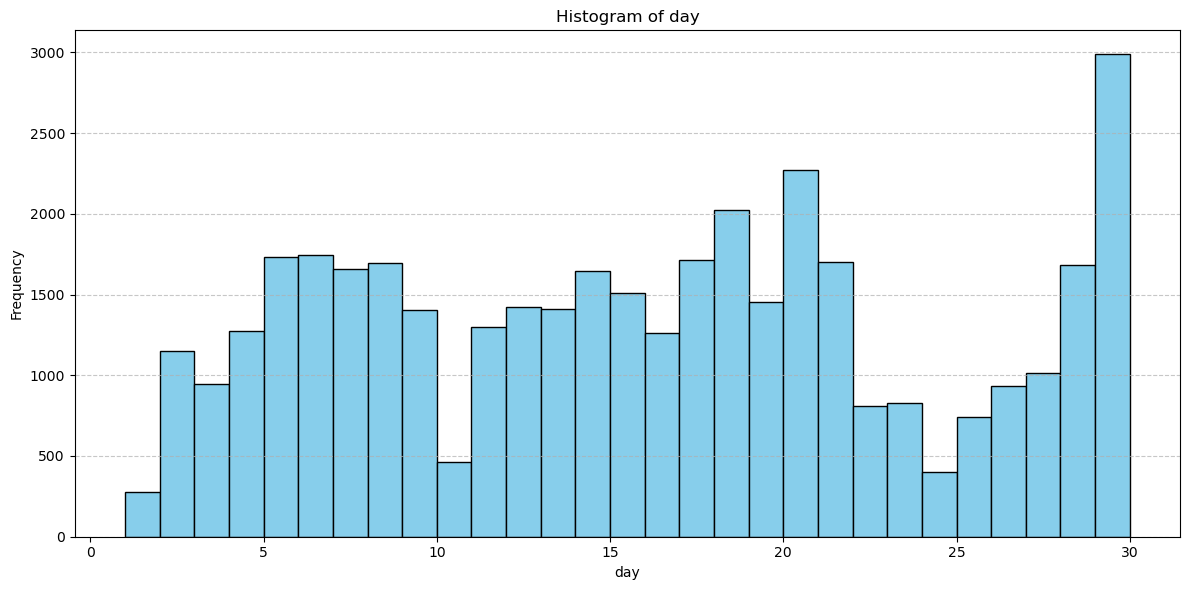

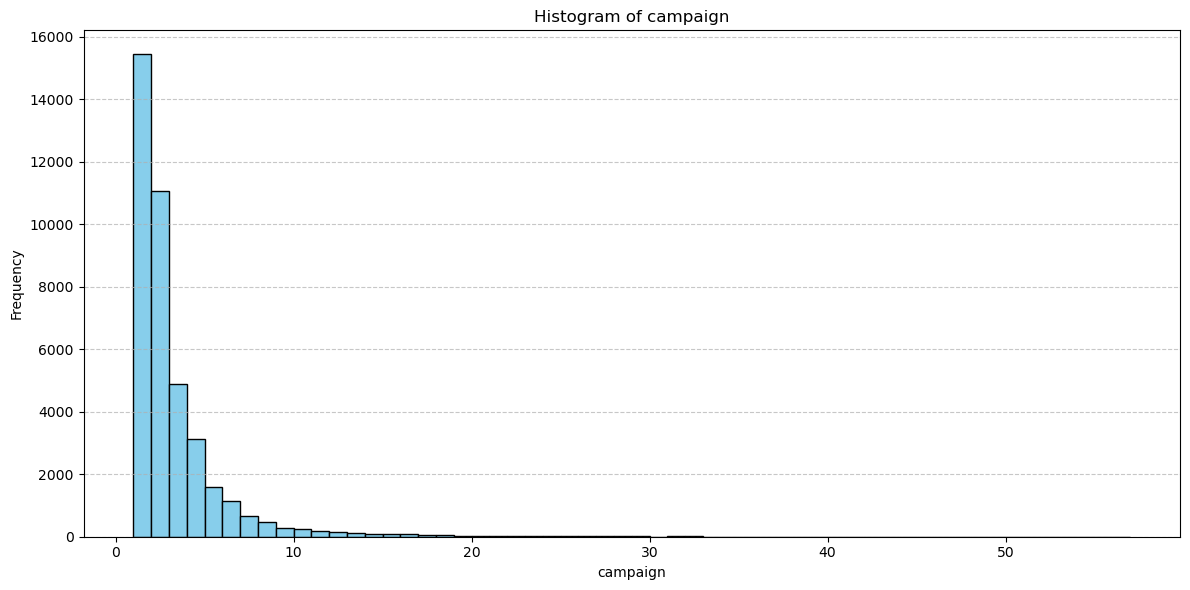

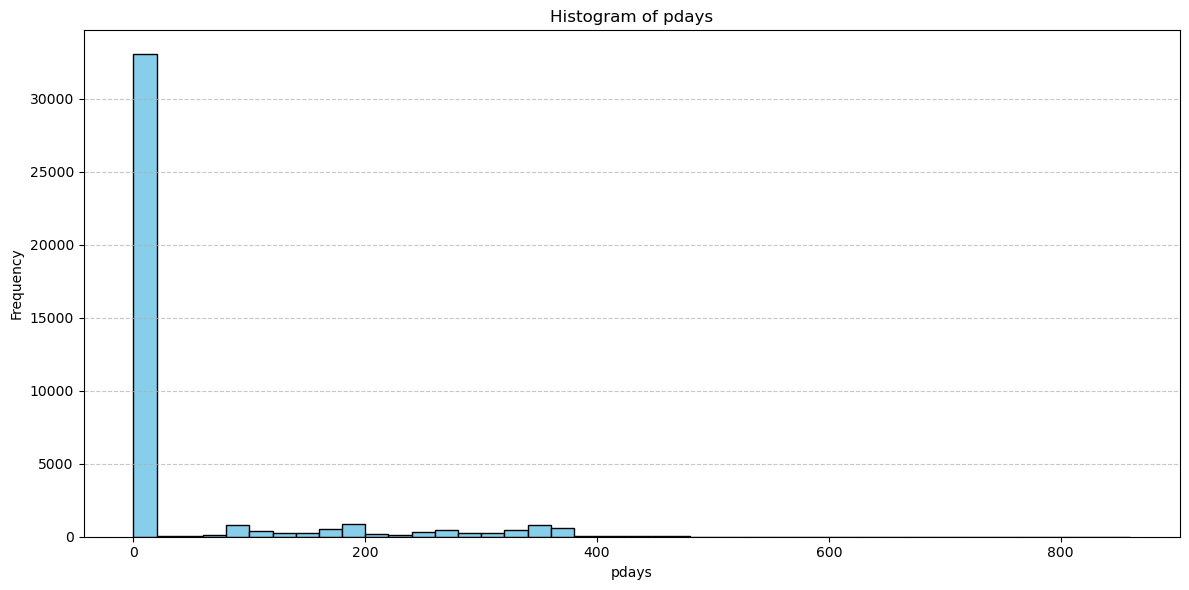

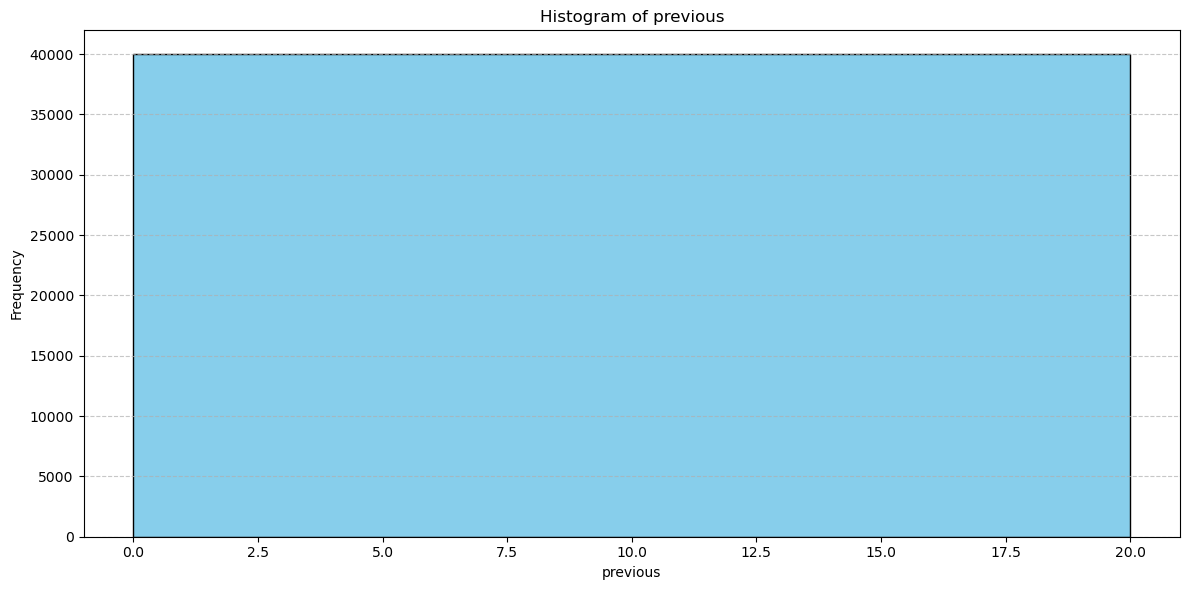

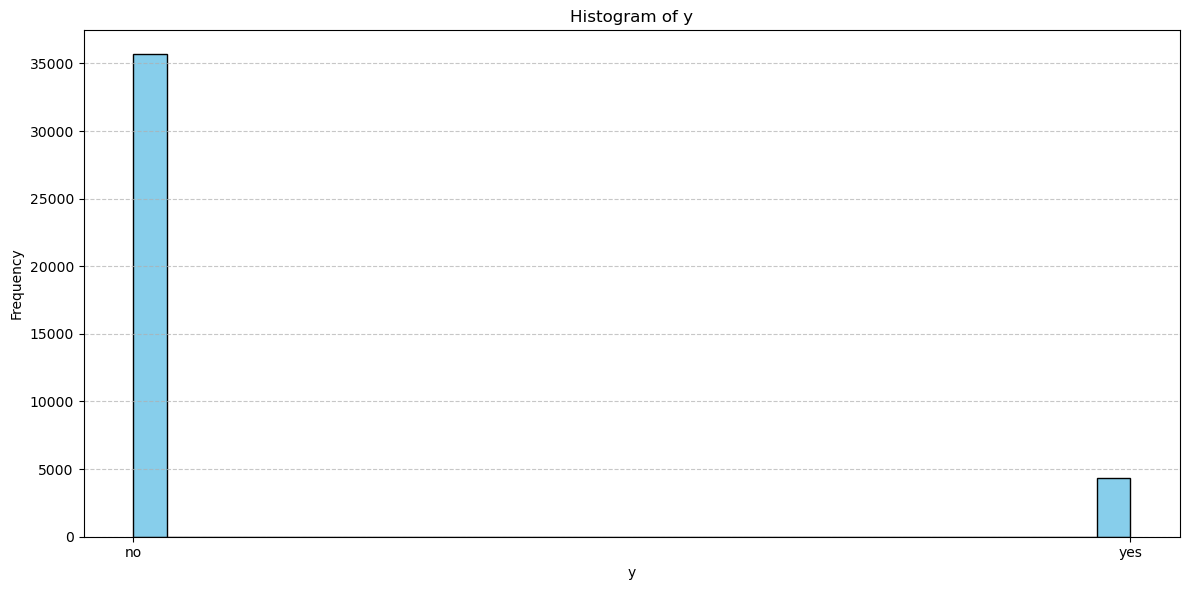

In [18]:
# Define bins for specific variables with smaller ranges
binning = {
    'age': np.arange(min(data['age']), max(data['age']), 4),        
    'balance': np.arange(min(data['balance']), max(data['balance']), 100),  
    'day': np.arange(min(data['day']), max(data['day']), 1),        
    'campaign': np.arange(min(data['campaign']), max(data['campaign']), 1),
    'pdays': np.arange(min(data['pdays']), max(data['pdays']), 20),
    'previous': np.arange(min(data['previous']), max(data['previous']), 20)
}

# Plot frequency distribution with histograms
for column in data2.columns:
    plt.figure(figsize=(12, 6))
    
    if column in binning:  # Apply binning for specific variables
        plt.hist(data2[column], bins=binning[column], color='skyblue', edgecolor='black')
    else:
        plt.hist(data2[column], bins=30, color='skyblue', edgecolor='black')  # Default bin size if not specified
    
    # Common styling
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

### Barchart (cathegorical data)

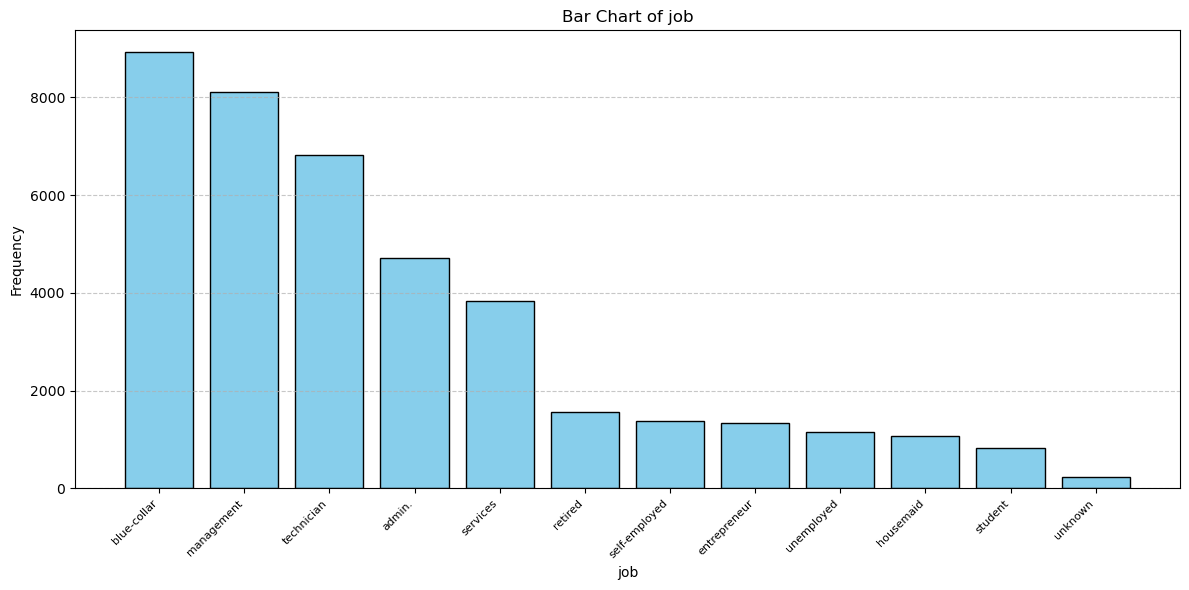

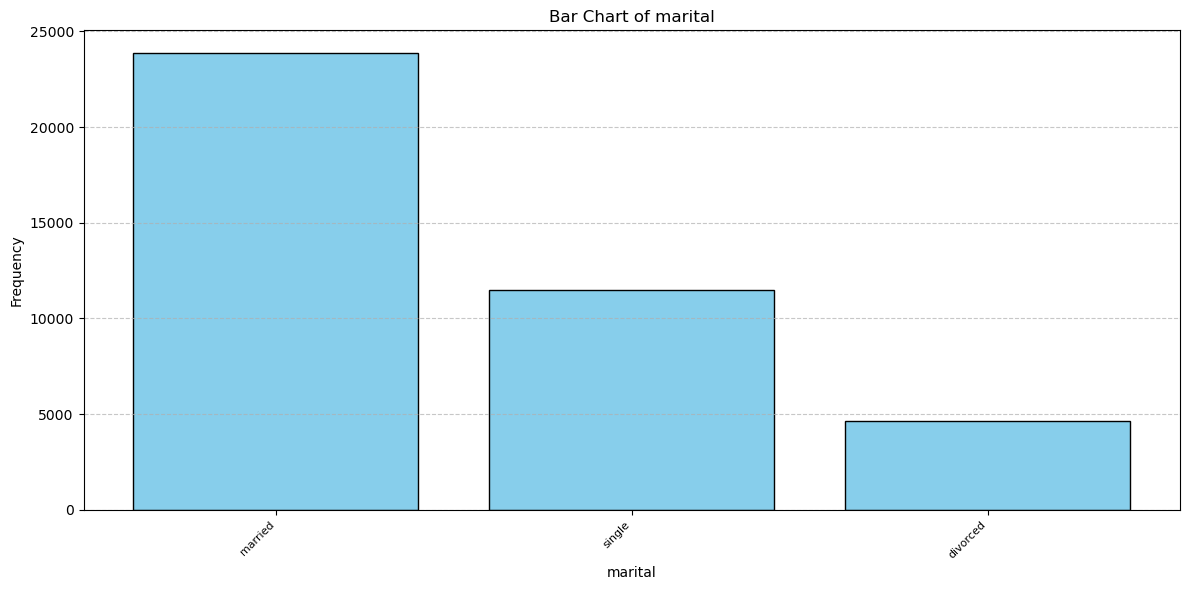

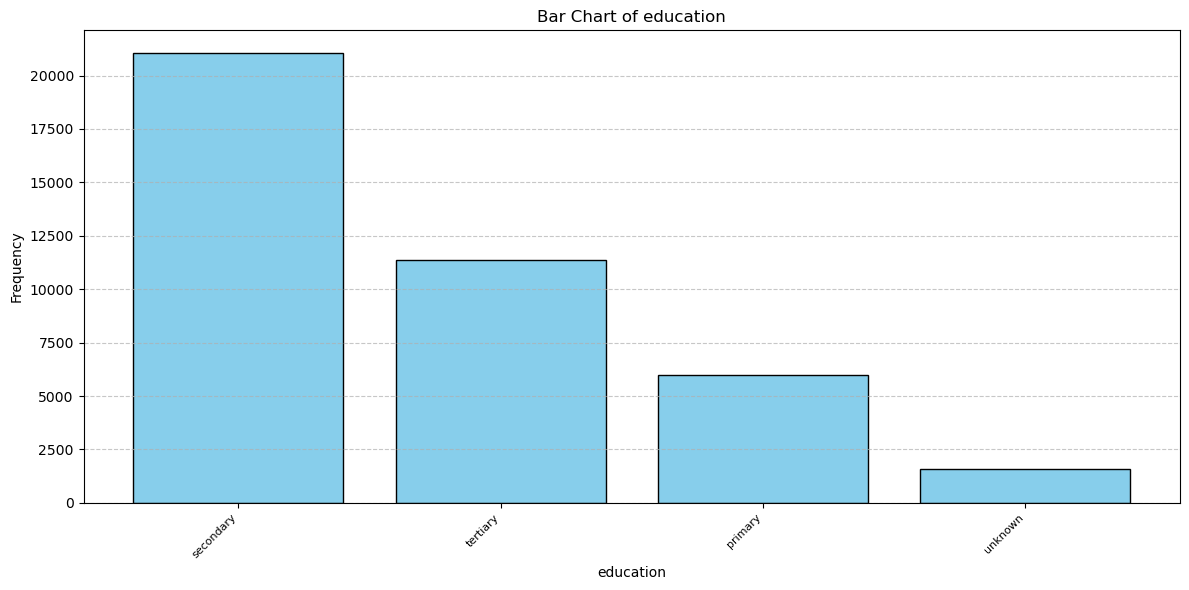

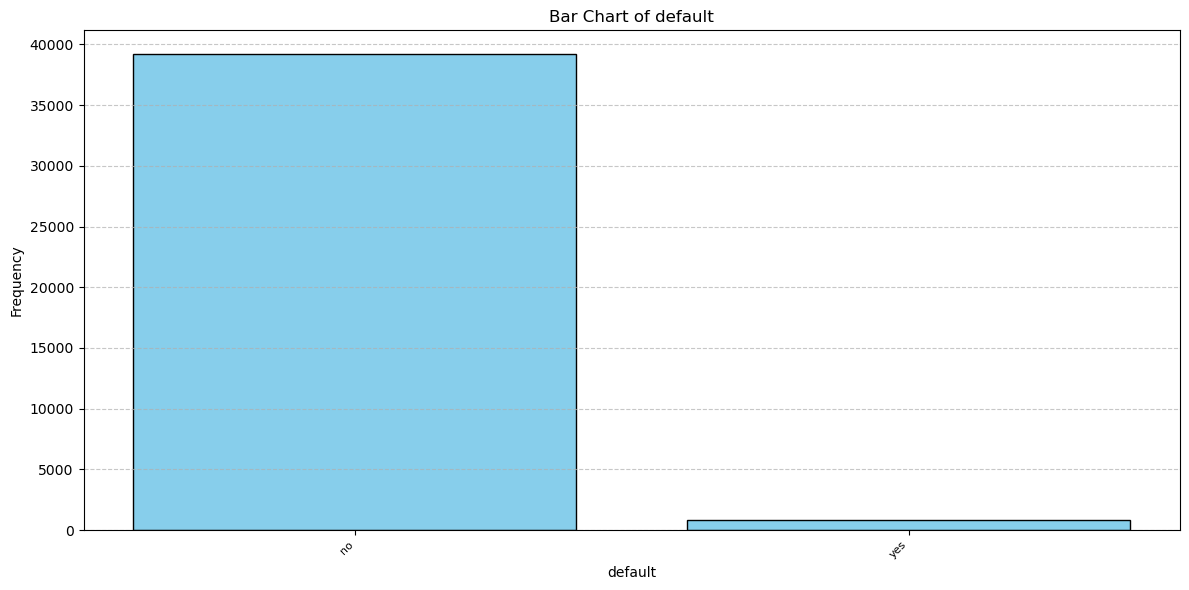

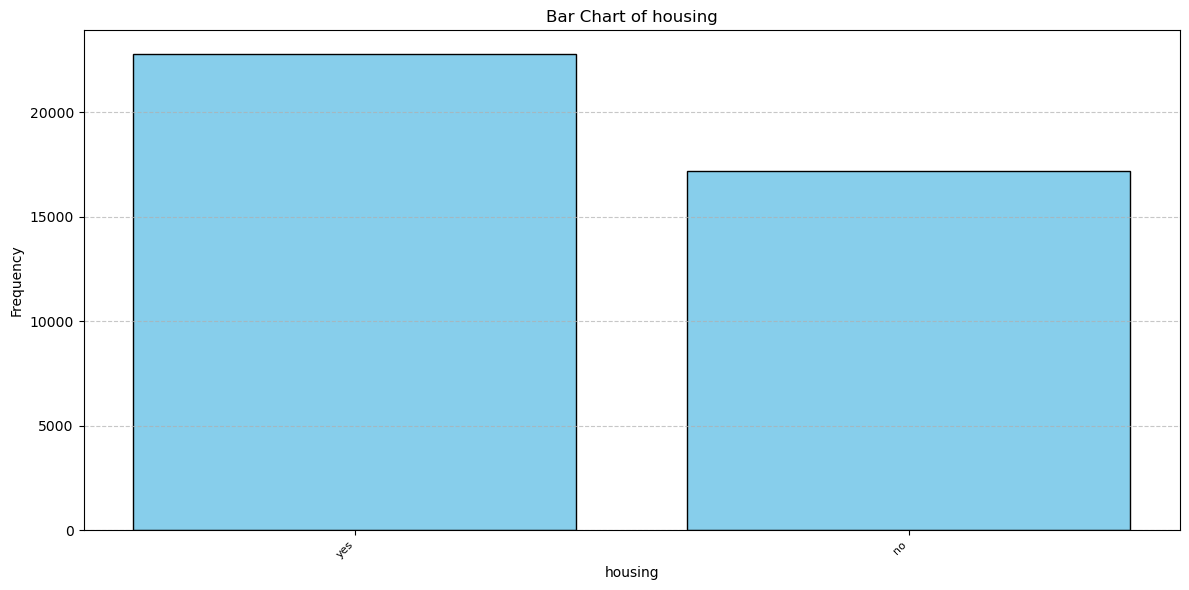

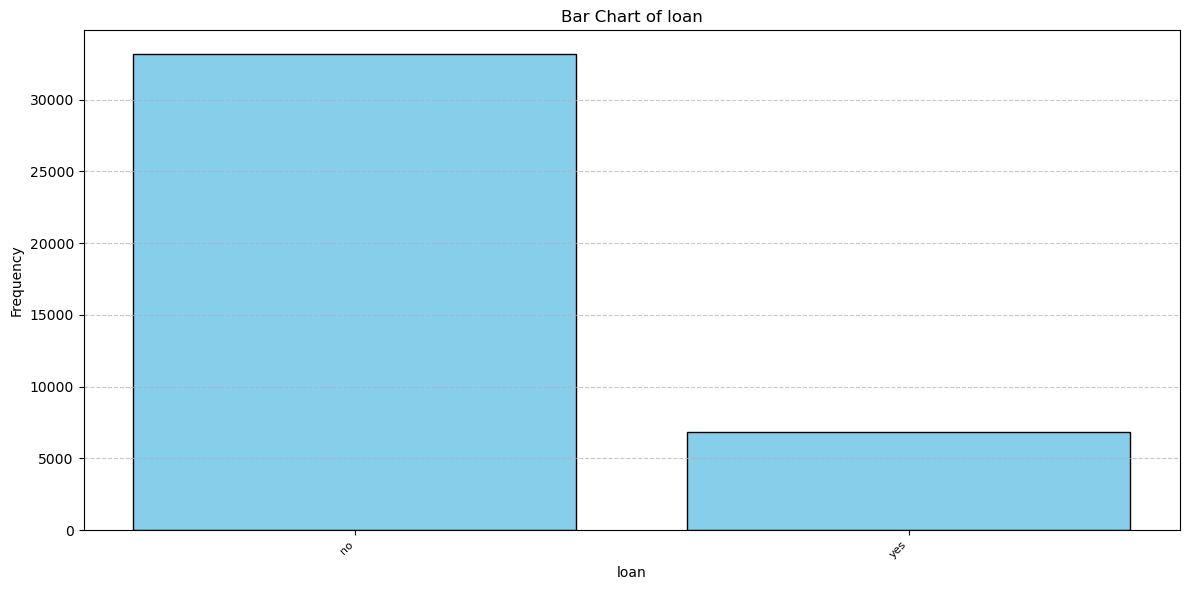

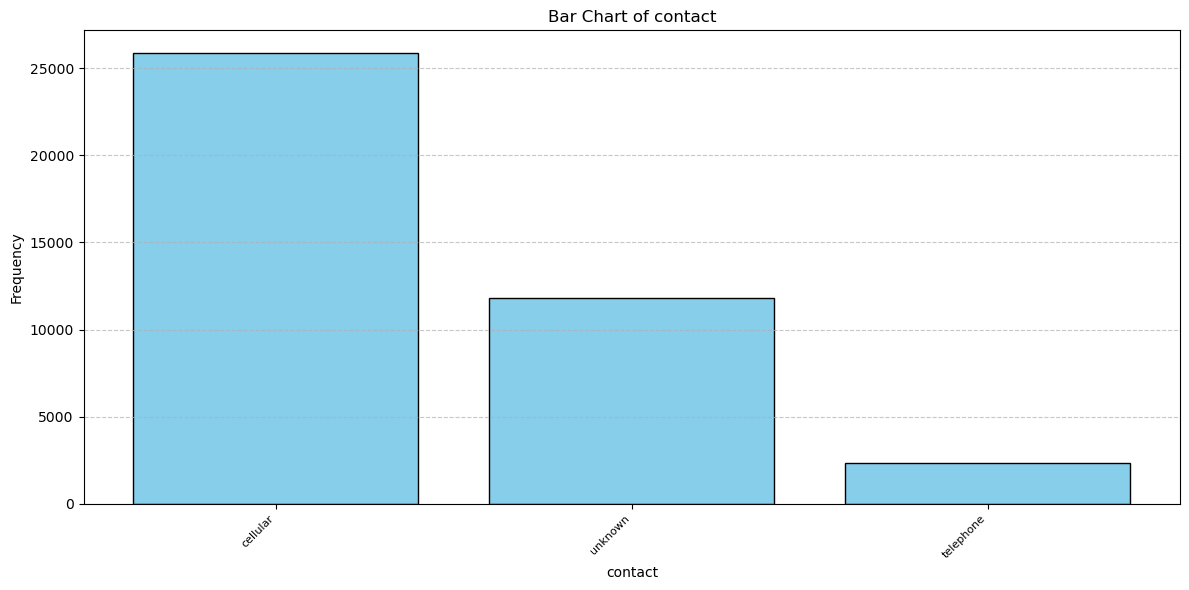

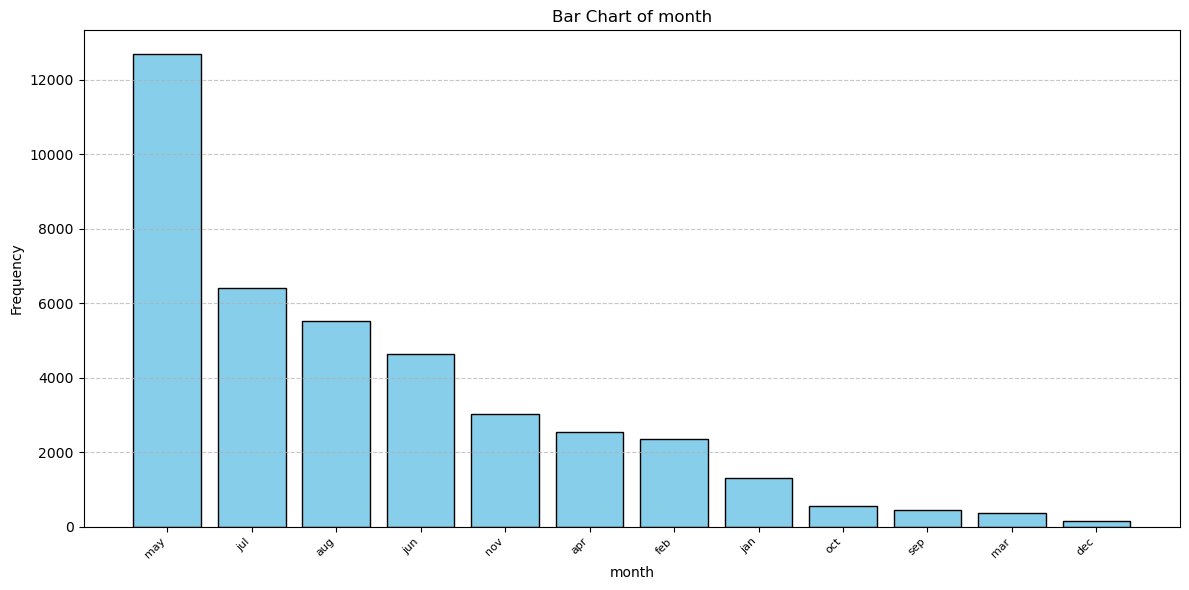

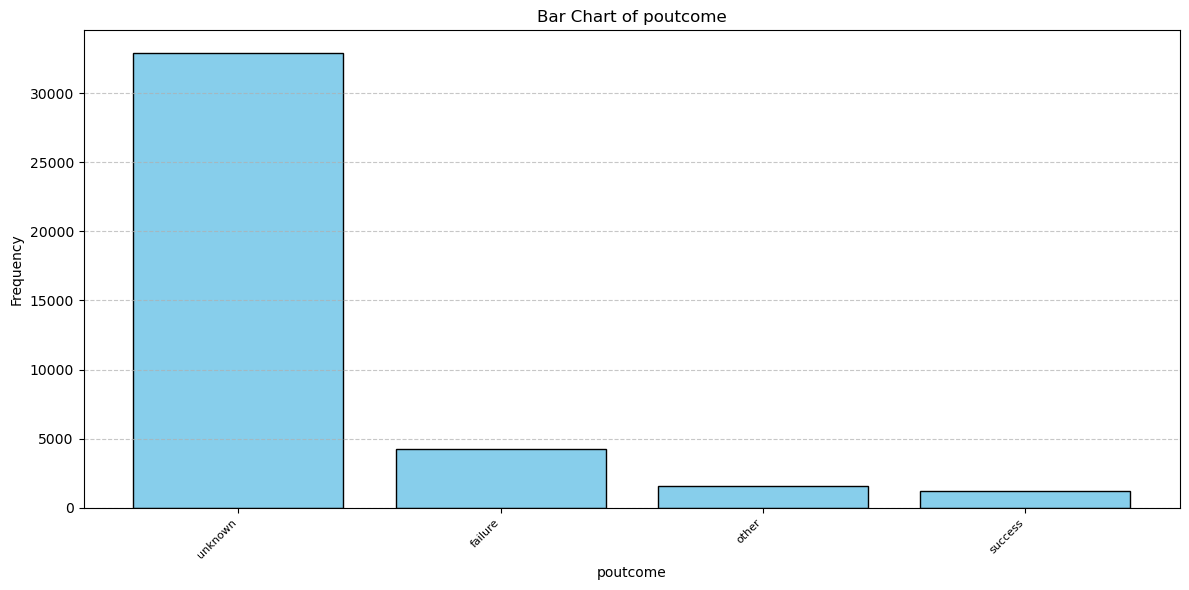

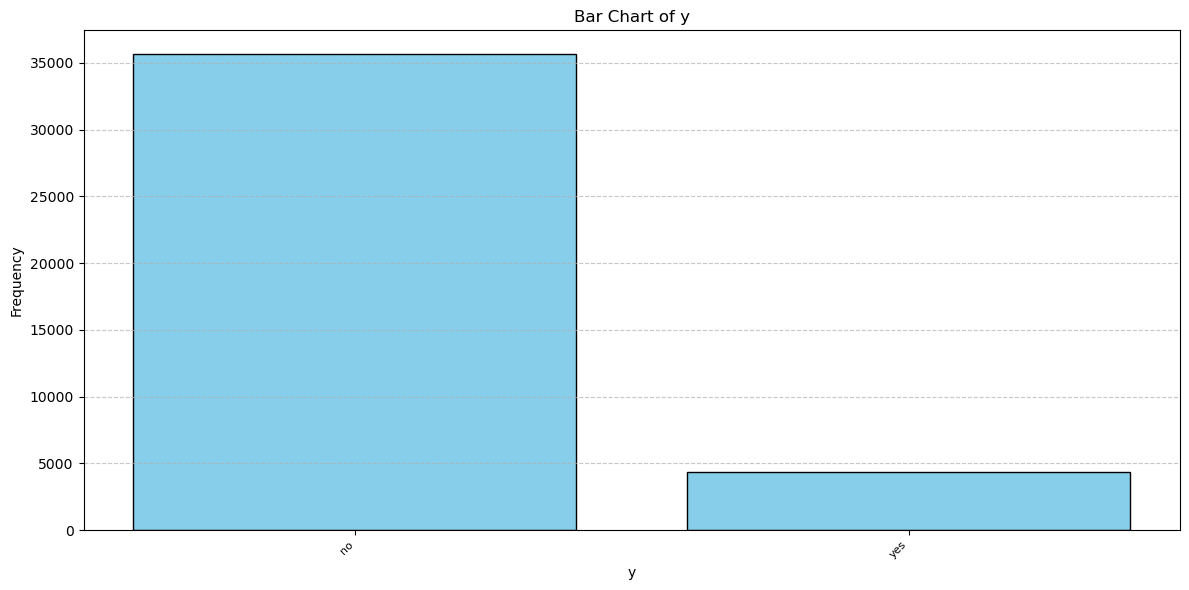

In [19]:
# Load the dataset
data=deposit3

# Drop the 'ID' column
data3 = data.drop(columns=['age', 'balance', 'day','campaign','pdays','previous'])

# Select categorical columns
#categorical_data = data.select_dtypes(include=['object'])

# Plot bar charts for each categorical variable
for column in data3.columns:
    value_counts = data3[column].value_counts()
    plt.figure(figsize=(12, 6))
    plt.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
    plt.title(f"Bar Chart of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

#### Comparison for job

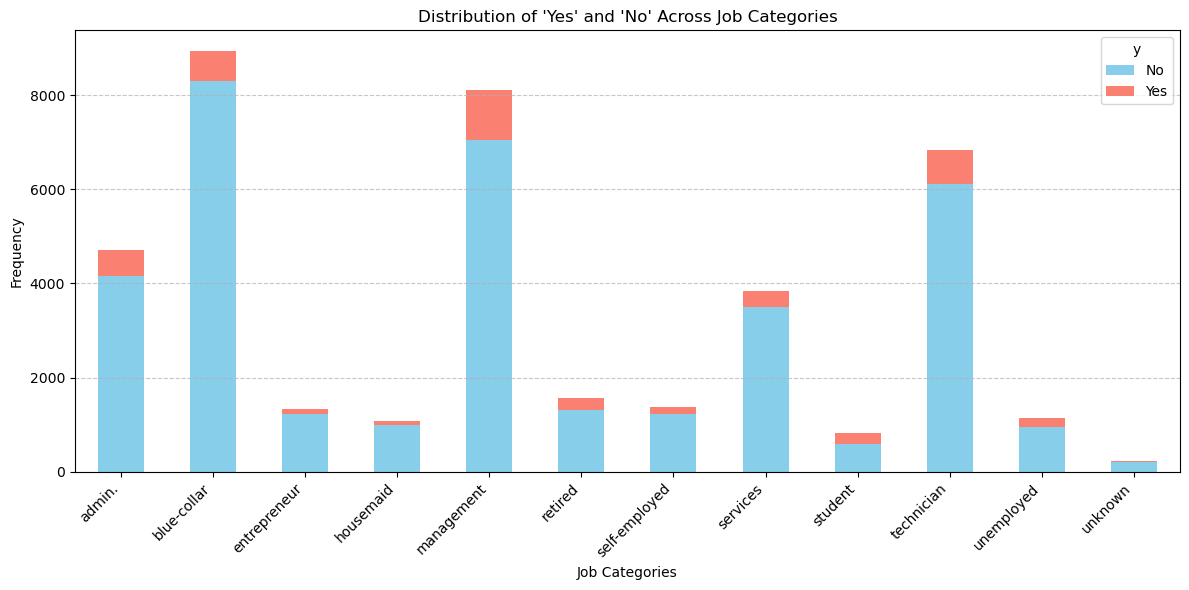

In [20]:
# Calculate counts for 'job' grouped by 'y'
grouped = data3.groupby(['job', 'y']).size().unstack(fill_value=0)

# Plot a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
grouped.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=ax)

# Add labels and title
plt.title("Distribution of 'Yes' and 'No' Across Job Categories")
plt.xlabel("Job Categories")
plt.ylabel("Frequency")
plt.legend(title='y', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
# Group by 'job' and 'y' to calculate counts
grouped = data3.groupby(['job', 'y']).size().unstack(fill_value=0)

# Calculate percentages for each 'job'
percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Use Pandas Styler for a nicely formatted table
styled_table = (
    percentage.style
    .format("{:.2f}%")  # Format percentages
    .background_gradient(cmap="coolwarm", axis=1)  # Add a color gradient
    .set_caption("Percentage of 'Yes' and 'No' for Each Job Category")  # Add a caption
    .set_table_styles(
        [
            {"selector": "caption", "props": [("text-align", "center"), ("font-size", "16px"), ("font-weight", "bold")]},
            {"selector": "thead th", "props": [("background-color", "lightgray"), ("text-align", "center"), ("font-weight", "bold")]},
            {"selector": "tbody td", "props": [("text-align", "center")]},
        ]
    )
)

# Display the styled table
styled_table

y,no,yes
job,,
admin.,88.43%,11.57%
blue-collar,92.92%,7.08%
entrepreneur,92.18%,7.82%
housemaid,91.86%,8.14%
management,86.96%,13.04%
retired,83.07%,16.93%
self-employed,88.73%,11.27%
services,91.24%,8.76%
student,71.89%,28.11%


#### Comparison for education

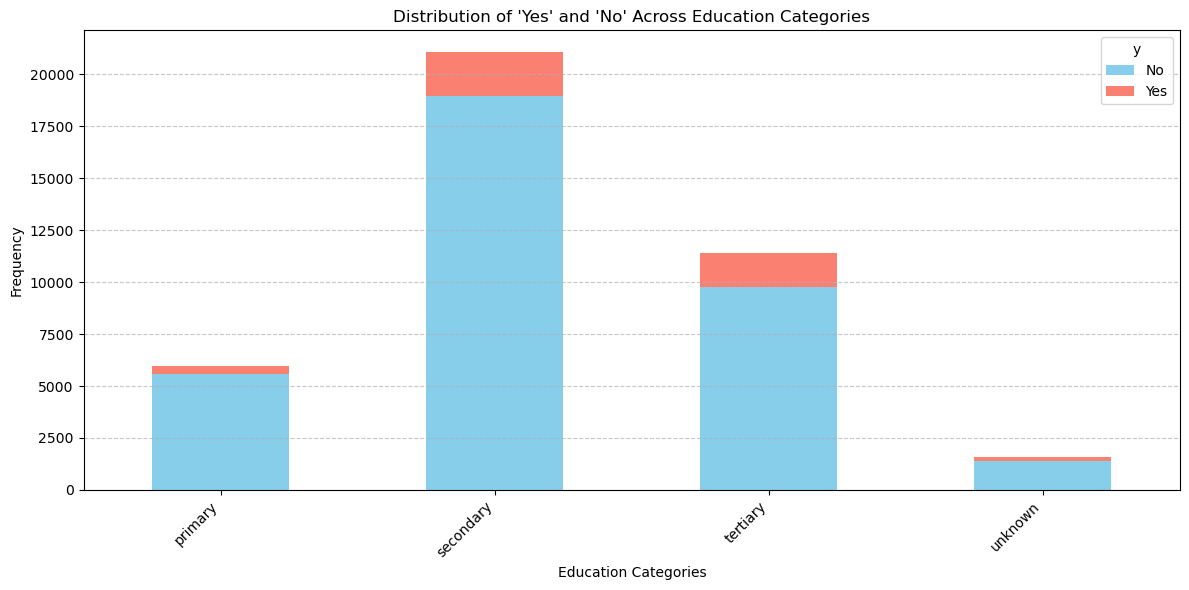

In [22]:
# Calculate counts for 'job' grouped by 'y'
grouped = data3.groupby(['education', 'y']).size().unstack(fill_value=0)

# Plot a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
grouped.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=ax)

# Add labels and title
plt.title("Distribution of 'Yes' and 'No' Across Education Categories")
plt.xlabel("Education Categories")
plt.ylabel("Frequency")
plt.legend(title='y', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
# Group by 'job' and 'y' to calculate counts
grouped = data3.groupby(['education', 'y']).size().unstack(fill_value=0)

# Calculate percentages for each 'job'
percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Use Pandas Styler for a nicely formatted table
styled_table = (
    percentage.style
    .format("{:.2f}%")  # Format percentages
    .background_gradient(cmap="coolwarm", axis=1)  # Add a color gradient
    .set_caption("Percentage of 'Yes' and 'No' for Each Education Category")  # Add a caption
    .set_table_styles(
        [
            {"selector": "caption", "props": [("text-align", "center"), ("font-size", "16px"), ("font-weight", "bold")]},
            {"selector": "thead th", "props": [("background-color", "lightgray"), ("text-align", "center"), ("font-weight", "bold")]},
            {"selector": "tbody td", "props": [("text-align", "center")]},
        ]
    )
)

# Display the styled table
styled_table

y,no,yes
education,,
primary,93.11%,6.89%
secondary,89.93%,10.07%
tertiary,85.78%,14.22%
unknown,88.05%,11.95%


# Variable Transformation

Transformation from categorical variables to numercial/binary

In [24]:
from sklearn.preprocessing import LabelEncoder

# Identificare le colonne di tipo stringa (object)
string_columns = deposit3.select_dtypes(include=['object']).columns

# Applicare il Label Encoding a tutte le colonne di tipo stringa
label_encoders = {}
for column in string_columns:
    le = LabelEncoder()
    deposit3[column] = le.fit_transform(deposit3[column].astype(str))
    label_encoders[column] = le

# Visualizzare le prime righe dopo la conversione
deposit3.head()

/var/folders/f9/c58y0kq13x3byft7fk0g0htw0000gn/T/ipykernel_93572/398750909.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deposit3[column] = le.fit_transform(deposit3[column].astype(str))
/var/folders/f9/c58y0kq13x3byft7fk0g0htw0000gn/T/ipykernel_93572/398750909.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deposit3[column] = le.fit_transform(deposit3[column].astype(str))
/var/folders/f9/c58y0kq13x3byft7fk0g0htw0000gn/T/ipykernel_93572/398750909.py:10: SettingWithCopyWarning: 
A value is trying

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
1,44.0,9,2,1,0,29.0,1,0,2,5,8,1,0,0,3,0
2,33.0,2,1,1,0,2.0,1,1,2,5,8,1,0,0,3,0
3,47.0,1,1,3,0,1506.0,1,0,2,5,8,1,0,0,3,0
4,33.0,11,2,3,0,1.0,0,0,2,5,8,1,0,0,3,0
5,35.0,4,1,2,0,231.0,1,0,2,5,8,1,0,0,3,0


In [25]:
encoding_maps = {col: dict(zip(le.classes_, le.transform(le.classes_))) for col, le in label_encoders.items()}
encoding_maps

{'job': {'admin.': 0,
  'blue-collar': 1,
  'entrepreneur': 2,
  'housemaid': 3,
  'management': 4,
  'retired': 5,
  'self-employed': 6,
  'services': 7,
  'student': 8,
  'technician': 9,
  'unemployed': 10,
  'unknown': 11},
 'marital': {'divorced': 0, 'married': 1, 'single': 2},
 'education': {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3},
 'default': {'no': 0, 'yes': 1},
 'housing': {'no': 0, 'yes': 1},
 'loan': {'no': 0, 'yes': 1},
 'contact': {'cellular': 0, 'telephone': 1, 'unknown': 2},
 'month': {'apr': 0,
  'aug': 1,
  'dec': 2,
  'feb': 3,
  'jan': 4,
  'jul': 5,
  'jun': 6,
  'mar': 7,
  'may': 8,
  'nov': 9,
  'oct': 10,
  'sep': 11},
 'poutcome': {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3},
 'y': {'no': 0, 'yes': 1}}

# Logistic regression

### Model 1

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load your dataset (assuming deposit3 is already loaded)
X = deposit3.drop(columns=['y'])
y = deposit3['y']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Scale training data
X_test = scaler.transform(X_test)  # Scale test data

log_reg = LogisticRegression(random_state=42, max_iter=500)  # Increased max_iter
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate model performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7133
           1       0.47      0.01      0.02       868

    accuracy                           0.89      8001
   macro avg       0.68      0.50      0.48      8001
weighted avg       0.85      0.89      0.84      8001


Accuracy Score: 0.8913885764279466

Confusion Matrix:
 [[7123   10]
 [ 859    9]]


Apply undersampling

### Model 2 --> best model

In [28]:
from imblearn.under_sampling import RandomUnderSampler
X = deposit3.drop(columns=['y'])
y = deposit3['y']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check class distribution before balancing
print("Original class distribution in y_train:")
print(y_train.value_counts())

# Apply undersampling to the training set
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

print("\nClass distribution after undersampling:")
print(y_train_balanced.value_counts())

# Scale the data
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Train logistic regression model on balanced and scaled data
log_reg = LogisticRegression(random_state=42, max_iter=500)  # Increased max_iter
log_reg.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate model performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Original class distribution in y_train:
y
0    28529
1     3472
Name: count, dtype: int64

Class distribution after undersampling:
y
0    3472
1    3472
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.64      0.76      7133
           1       0.19      0.68      0.29       868

    accuracy                           0.65      8001
   macro avg       0.56      0.66      0.53      8001
weighted avg       0.86      0.65      0.71      8001


Accuracy Score: 0.6461692288463942

Confusion Matrix:
 [[4583 2550]
 [ 281  587]]


Apply Regularization terms to logistic regression

### Model 3

In [29]:
# Train logistic regression model with L1 regularization on balanced and scaled data
log_reg = LogisticRegression(random_state=42, max_iter=500, penalty='l1', solver='liblinear', C=1.0)  # Added L1 regularization
log_reg.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate model performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.64      0.76      7133
           1       0.19      0.68      0.29       868

    accuracy                           0.65      8001
   macro avg       0.56      0.66      0.53      8001
weighted avg       0.86      0.65      0.71      8001


Accuracy Score: 0.6452943382077241

Confusion Matrix:
 [[4576 2557]
 [ 281  587]]


### Model 4

In [30]:
# Train logistic regression model with L2 regularization on balanced and scaled data
log_reg = LogisticRegression(random_state=42, max_iter=500, penalty='l2', solver='lbfgs', C=1.0)  # Changed to L2 regularization
log_reg.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate model performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.64      0.76      7133
           1       0.19      0.68      0.29       868

    accuracy                           0.65      8001
   macro avg       0.56      0.66      0.53      8001
weighted avg       0.86      0.65      0.71      8001


Accuracy Score: 0.6461692288463942

Confusion Matrix:
 [[4583 2550]
 [ 281  587]]


Adjust the class weights in the logistic regression model

### Model 5

In [31]:
X = deposit3.drop(columns=['y'])
y = deposit3['y']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Scale training data
X_test = scaler.transform(X_test)  # Scale test data

# Define class weights to address imbalance
# Higher weight for Class 1 to penalize misclassifications more heavily
class_weights = {0: 1, 1: 10} 

# Train logistic regression model with increased max_iter and a suitable solver
log_reg = LogisticRegression(
    random_state=42,
    max_iter=1000,  # Increase max_iter
    solver='liblinear',  # Use liblinear for smaller datasets
    class_weight=class_weights,
    C=0.1  # Reduce regularization strength to help convergence
)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate model performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.54      0.69      7133
           1       0.17      0.76      0.27       868

    accuracy                           0.56      8001
   macro avg       0.56      0.65      0.48      8001
weighted avg       0.86      0.56      0.64      8001


Accuracy Score: 0.5609298837645295

Confusion Matrix:
 [[3828 3305]
 [ 208  660]]


Graphical Rapresentation of the best model

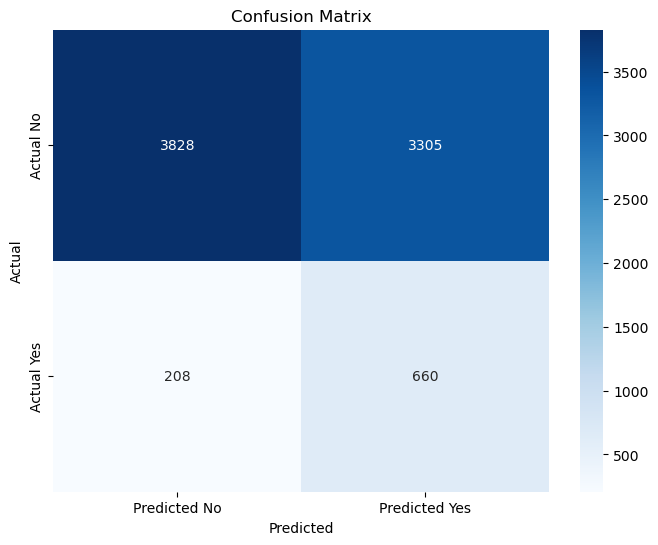

0.7254499919566421


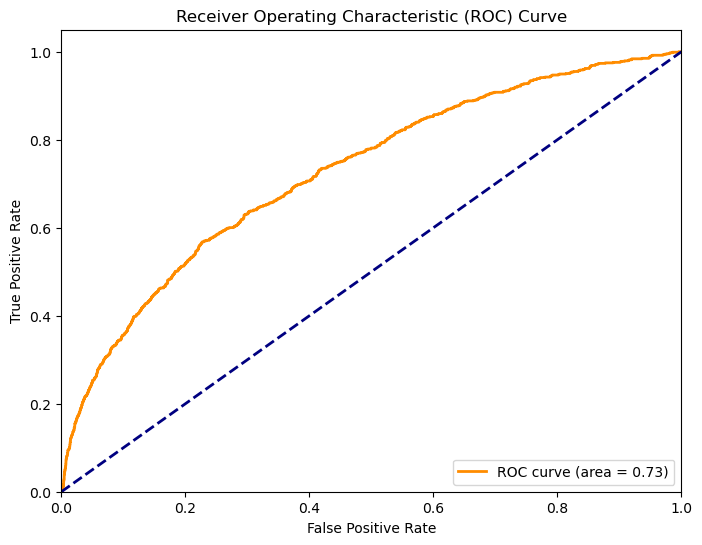

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

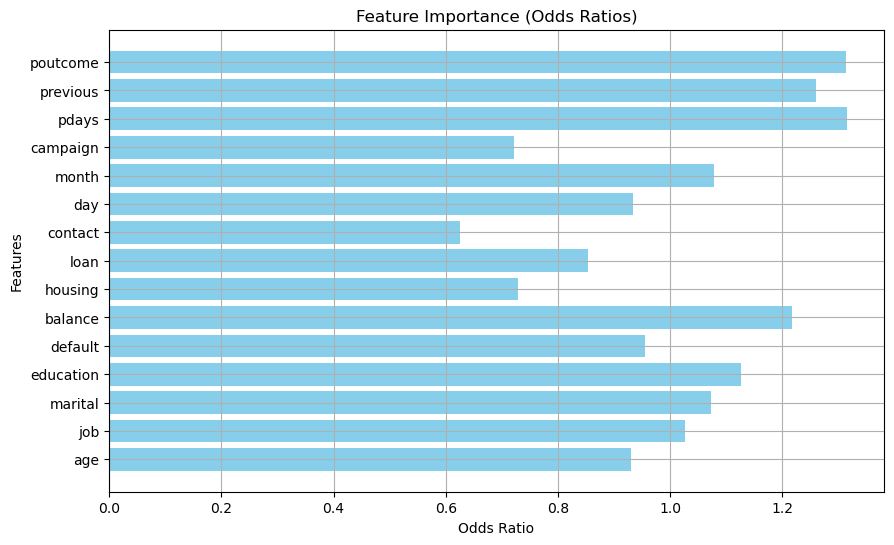

In [33]:
# Feature Importance Plot
coefficients = log_reg.coef_[0]
odds_ratios = np.exp(coefficients)
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, odds_ratios, color='skyblue')
plt.title("Feature Importance (Odds Ratios)")
plt.xlabel("Odds Ratio")
plt.ylabel("Features")
plt.grid(True)
plt.show()

# Neural Network

In [23]:
import tensorflow as tf
from tensorflow import keras

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

### Model 1

In [25]:
model1 = Sequential([
    Dense(128, input_dim=15, activation='relu'),  # Input layer with 15 neurons (matching the number of features)
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dropout(0.3),  # Dropout layer
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
])

/Users/matteomontrucchio/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model1.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [27]:
history = model1.fit(X_train_balanced, y_train_balanced, 
                    validation_data=(X_test, y_test), 
                    epochs=50, 
                    batch_size=32, 
                    verbose=1)

Epoch 1/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - accuracy: 0.5904 - loss: 0.6637 - val_accuracy: 0.7058 - val_loss: 0.5880
Epoch 2/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.6668 - loss: 0.6217 - val_accuracy: 0.6933 - val_loss: 0.6002
Epoch 3/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.6758 - loss: 0.6038 - val_accuracy: 0.6937 - val_loss: 0.6242
Epoch 4/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.6877 - loss: 0.6002 - val_accuracy: 0.7332 - val_loss: 0.5818
Epoch 5/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.6717 - loss: 0.6057 - val_accuracy: 0.6872 - val_loss: 0.6224
Epoch 6/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.6844 - loss: 0.6016 - val_accuracy: 0.7089 - val_loss: 0.5996
Epoch 7/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.6912 - loss: 0.5906 - val_accuracy: 0.6929 - val_loss: 0.6183
Epoch 8/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.6826 - loss: 0.5850 - 

In [28]:
y_pred_ann1 = model1.predict(X_test)
y_pred_ann_class1 = (y_pred_ann1 > 0.5).astype(int)  # Threshold at 0.5

251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step


In [29]:
from sklearn.metrics import roc_auc_score, classification_report

print("\nClassification Report (ANN):")
print(classification_report(y_test, y_pred_ann_class1))

roc_auc_ann = roc_auc_score(y_test, y_pred_ann1)
print("\nROC-AUC Score (ANN):", roc_auc_ann)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_ann_class1))


Classification Report (ANN):
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      7133
           1       0.22      0.65      0.33       868

    accuracy                           0.71      8001
   macro avg       0.58      0.68      0.57      8001
weighted avg       0.87      0.71      0.76      8001


ROC-AUC Score (ANN): 0.7533128782235615

Accuracy Score: 0.7076615423072116


### Model 2

In [30]:
model2 = Sequential([
    Dense(64, input_dim=15, activation='relu'),  # Input layer with 15 neurons (matching the number of features)
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(32, activation='relu'),  # Hidden layer with 64 neurons
    Dropout(0.3),  # Dropout layer
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
])

/Users/matteomontrucchio/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model2.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [32]:
history = model2.fit(X_train_balanced, y_train_balanced, 
                    validation_data=(X_test, y_test), 
                    epochs=50, 
                    batch_size=32, 
                    verbose=1)

Epoch 1/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - accuracy: 0.5814 - loss: 0.6827 - val_accuracy: 0.6380 - val_loss: 0.6261
Epoch 2/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.6376 - loss: 0.6358 - val_accuracy: 0.7077 - val_loss: 0.5927
Epoch 3/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.6520 - loss: 0.6335 - val_accuracy: 0.7130 - val_loss: 0.6010
Epoch 4/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.6711 - loss: 0.6133 - val_accuracy: 0.7367 - val_loss: 0.5835
Epoch 5/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.6672 - loss: 0.6128 - val_accuracy: 0.7352 - val_loss: 0.5793
Epoch 6/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.6757 - loss: 0.6081 - val_accuracy: 0.7408 - val_loss: 0.5846
Epoch 7/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.6775 - loss: 0.6018 - val_accuracy: 0.7423 - val_loss: 0.5719
Epoch 8/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.6787 - loss: 0.6017 - 

In [33]:
y_pred_ann2 = model2.predict(X_test)
y_pred_ann_class2 = (y_pred_ann2 > 0.5).astype(int)  # Threshold at 0.5

251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step


In [34]:
print("\nClassification Report (ANN):")
print(classification_report(y_test, y_pred_ann_class2))

roc_auc_ann = roc_auc_score(y_test, y_pred_ann2)
print("\nROC-AUC Score (ANN):", roc_auc_ann)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_ann_class2))


Classification Report (ANN):
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      7133
           1       0.24      0.60      0.34       868

    accuracy                           0.75      8001
   macro avg       0.59      0.68      0.59      8001
weighted avg       0.86      0.75      0.79      8001


ROC-AUC Score (ANN): 0.7528470741235809

Accuracy Score: 0.7456567929008874


### Model 3 --> best model

In [35]:
model3 = Sequential([
    Dense(128, input_dim=15, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model3.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model3.fit(X_train_balanced, y_train_balanced, 
                    validation_data=(X_test, y_test), 
                    epochs=50, 
                    batch_size=32, 
                    verbose=1)

y_pred_ann3 = model3.predict(X_test)
y_pred_ann_class3 = (y_pred_ann3 > 0.5).astype(int)  # Threshold at 0.5

print("\nClassification Report (ANN):")
print(classification_report(y_test, y_pred_ann_class3))

roc_auc_ann = roc_auc_score(y_test, y_pred_ann3)
print("\nROC-AUC Score (ANN):", roc_auc_ann)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_ann_class3))

Epoch 1/50


/Users/matteomontrucchio/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5919 - loss: 0.6689 - val_accuracy: 0.6817 - val_loss: 0.6315
Epoch 2/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.6583 - loss: 0.6262 - val_accuracy: 0.7314 - val_loss: 0.6016
Epoch 3/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.6719 - loss: 0.6205 - val_accuracy: 0.7488 - val_loss: 0.5952
Epoch 4/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.6728 - loss: 0.6102 - val_accuracy: 0.7673 - val_loss: 0.5647
Epoch 5/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.6635 - loss: 0.6104 - val_accuracy: 0.7720 - val_loss: 0.5610
Epoch 6/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.6675 - loss: 0.6073 - val_accuracy: 0.7635 - val_loss: 0.5639
Epoch 7/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.6828 - loss: 0.6020 - val_accuracy: 0.7268 - val_loss: 0.6244
Epoch 8/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.6714 - loss: 0.6089 - val_accuracy:

In [44]:
print(classification_report(y_test, y_pred_ann_class3))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      7133
           1       0.24      0.60      0.35       868

    accuracy                           0.76      8001
   macro avg       0.59      0.69      0.60      8001
weighted avg       0.87      0.76      0.80      8001



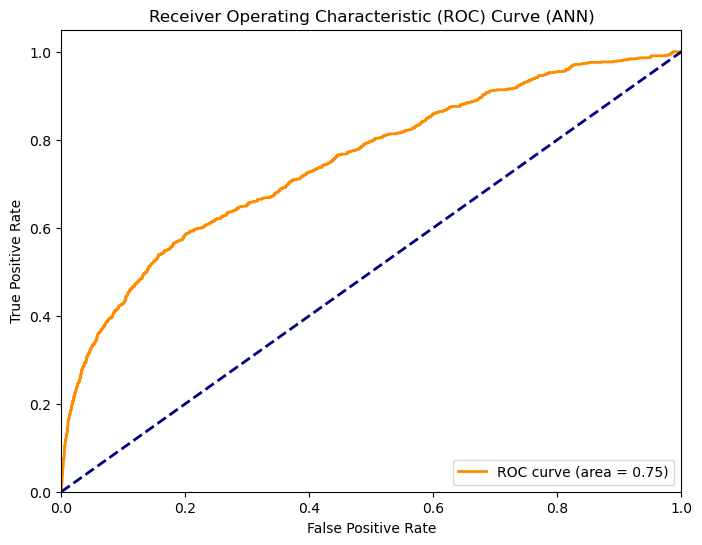

In [45]:
# Compute ROC curve and AUC for the ANN model
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ann3)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (ANN)')
plt.legend(loc='lower right')
plt.show()

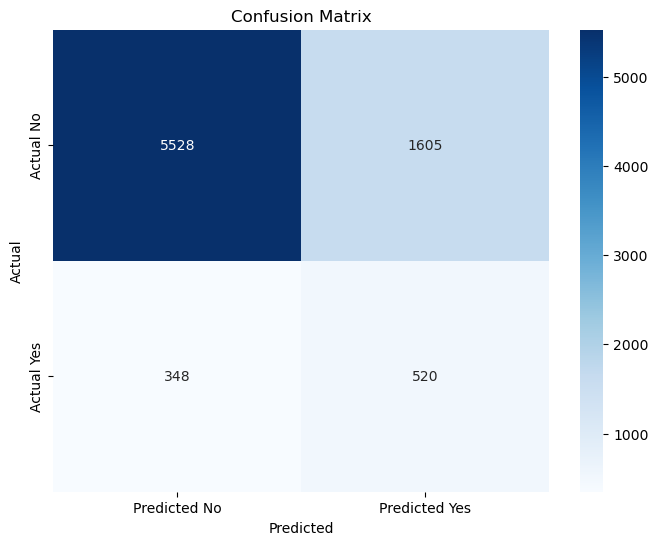

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred_ann_class3)

# Plot della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Model 4

In [36]:
from keras.layers import LeakyReLU

model4 = Sequential([
    Dense(64, input_dim=15),
    LeakyReLU(alpha=0.1),  # Leaky ReLU activation
    Dropout(0.3),
    Dense(32),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model4.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model4.fit(X_train_balanced, y_train_balanced, 
                    validation_data=(X_test, y_test), 
                    epochs=50, 
                    batch_size=32, 
                    verbose=1)

y_pred_ann4 = model4.predict(X_test)
y_pred_ann_class4 = (y_pred_ann4 > 0.5).astype(int)  # Threshold at 0.5

print("\nClassification Report (ANN):")
print(classification_report(y_test, y_pred_ann_class4))

roc_auc_ann = roc_auc_score(y_test, y_pred_ann4)
print("\nROC-AUC Score (ANN):", roc_auc_ann)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_ann_class4))

Epoch 1/50


/Users/matteomontrucchio/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/matteomontrucchio/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - accuracy: 0.5904 - loss: 0.6814 - val_accuracy: 0.6663 - val_loss: 0.5937
Epoch 2/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.6550 - loss: 0.6272 - val_accuracy: 0.6445 - val_loss: 0.6291
Epoch 3/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.6538 - loss: 0.6263 - val_accuracy: 0.7110 - val_loss: 0.5962
Epoch 4/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.6629 - loss: 0.6194 - val_accuracy: 0.7119 - val_loss: 0.6018
Epoch 5/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.6525 - loss: 0.6272 - val_accuracy: 0.7193 - val_loss: 0.5982
Epoch 6/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.6747 - loss: 0.6103 - val_accuracy: 0.7194 - val_loss: 0.6003
Epoch 7/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.6732 - loss: 0.6122 - val_accuracy: 0.7290 - val_loss: 0.5897
Epoch 8/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.6726 - loss: 0.6076 - val_accurac

### Model 5

In [37]:
model5 = Sequential([
    Dense(64, input_dim=15, activation='relu'),
    Dropout(0.1),  # Reduced dropout
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model5.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model5.fit(X_train_balanced, y_train_balanced, 
                    validation_data=(X_test, y_test), 
                    epochs=50, 
                    batch_size=32, 
                    verbose=1)

y_pred_ann5 = model5.predict(X_test)
y_pred_ann_class5 = (y_pred_ann5 > 0.5).astype(int)  # Threshold at 0.5

print("\nClassification Report (ANN):")
print(classification_report(y_test, y_pred_ann_class5))

roc_auc_ann = roc_auc_score(y_test, y_pred_ann5)
print("\nROC-AUC Score (ANN):", roc_auc_ann)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_ann_class5))

Epoch 1/50


/Users/matteomontrucchio/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.5877 - loss: 0.6637 - val_accuracy: 0.6407 - val_loss: 0.6417
Epoch 2/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.6665 - loss: 0.6144 - val_accuracy: 0.6829 - val_loss: 0.6224
Epoch 3/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.6651 - loss: 0.6102 - val_accuracy: 0.7110 - val_loss: 0.6045
Epoch 4/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.6852 - loss: 0.5970 - val_accuracy: 0.7387 - val_loss: 0.5768
Epoch 5/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.6835 - loss: 0.5933 - val_accuracy: 0.7339 - val_loss: 0.5816
Epoch 6/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.6815 - loss: 0.5899 - val_accuracy: 0.7502 - val_loss: 0.5652
Epoch 7/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.6972 - loss: 0.5774 - val_accuracy: 0.7627 - val_loss: 0.5491
Epoch 8/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.6900 - loss: 0.5886 - val_accurac

### Model 6

In [41]:
model6 = Sequential([
    Dense(128, input_dim=15, activation='relu'),
    Dropout(0.1),  # Reduced dropout
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation="relu"),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model6.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model6.fit(X_train_balanced, y_train_balanced, 
                    validation_data=(X_test, y_test), 
                    epochs=50, 
                    batch_size=32, 
                    verbose=1)

y_pred_ann6 = model6.predict(X_test)
y_pred_ann_class6 = (y_pred_ann6 > 0.5).astype(int)  # Threshold at 0.5

print("\nClassification Report (ANN):")
print(classification_report(y_test, y_pred_ann_class6))

roc_auc_ann = roc_auc_score(y_test, y_pred_ann6)
print("\nROC-AUC Score (ANN):", roc_auc_ann)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_ann_class6))

Epoch 1/50


/Users/matteomontrucchio/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6070 - loss: 0.6506 - val_accuracy: 0.7145 - val_loss: 0.5954
Epoch 2/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.6776 - loss: 0.6043 - val_accuracy: 0.6712 - val_loss: 0.6426
Epoch 3/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.6898 - loss: 0.5969 - val_accuracy: 0.7457 - val_loss: 0.5658
Epoch 4/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.6869 - loss: 0.5930 - val_accuracy: 0.7632 - val_loss: 0.5626
Epoch 5/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.6861 - loss: 0.5883 - val_accuracy: 0.7090 - val_loss: 0.6227
Epoch 6/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.7021 - loss: 0.5845 - val_accuracy: 0.7114 - val_loss: 0.6032
Epoch 7/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.7027 - loss: 0.5783 - val_accuracy: 0.7222 - val_loss: 0.5871
Epoch 8/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.7003 - loss: 0.5761 - val_accuracy:

### Model 7

In [42]:
from keras.layers import BatchNormalization

model7 = Sequential([
    Dense(64, input_dim=15, activation='relu'),
    BatchNormalization(),  # Normalize activations
    Dropout(0.1),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model7.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model7.fit(X_train_balanced, y_train_balanced, 
                    validation_data=(X_test, y_test), 
                    epochs=50, 
                    batch_size=32, 
                    verbose=1)

y_pred_ann7 = model7.predict(X_test)
y_pred_ann_class7 = (y_pred_ann7 > 0.5).astype(int)  # Threshold at 0.5

print("\nClassification Report (ANN):")
print(classification_report(y_test, y_pred_ann_class7))

roc_auc_ann = roc_auc_score(y_test, y_pred_ann7)
print("\nROC-AUC Score (ANN):", roc_auc_ann)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_ann_class7))

Epoch 1/50


/Users/matteomontrucchio/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5787 - loss: 0.7409 - val_accuracy: 0.7717 - val_loss: 0.5497
Epoch 2/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.6487 - loss: 0.6434 - val_accuracy: 0.7328 - val_loss: 0.5776
Epoch 3/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.6586 - loss: 0.6188 - val_accuracy: 0.7397 - val_loss: 0.5658
Epoch 4/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.6608 - loss: 0.6184 - val_accuracy: 0.7303 - val_loss: 0.5716
Epoch 5/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.6646 - loss: 0.6152 - val_accuracy: 0.7204 - val_loss: 0.5842
Epoch 6/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.6839 - loss: 0.6001 - val_accuracy: 0.7414 - val_loss: 0.5756
Epoch 7/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.6887 - loss: 0.5927 - val_accuracy: 0.7333 - val_loss: 0.5727
Epoch 8/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.6823 - loss: 0.5946 - val_accuracy:

### Model 8

In [43]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model8 = Sequential([
    Dense(64, input_dim=15, activation='relu'),
    Dropout(0.1),  # Reduced dropout
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model8.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model8.fit(X_train_balanced, y_train_balanced,
                     validation_data=(X_test, y_test),
                     epochs=50,
                     batch_size=32,
                     callbacks=[early_stopping],
                     verbose=1)

y_pred_ann8 = model8.predict(X_test)
y_pred_ann_class8 = (y_pred_ann8 > 0.5).astype(int)  # Threshold at 0.5

print("\nClassification Report (ANN):")
print(classification_report(y_test, y_pred_ann_class8))

roc_auc_ann = roc_auc_score(y_test, y_pred_ann8)
print("\nROC-AUC Score (ANN):", roc_auc_ann)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_ann_class8))

Epoch 1/50


/Users/matteomontrucchio/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5963 - loss: 0.6726 - val_accuracy: 0.6918 - val_loss: 0.5811
Epoch 2/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.6638 - loss: 0.6179 - val_accuracy: 0.6885 - val_loss: 0.6032
Epoch 3/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.6887 - loss: 0.5905 - val_accuracy: 0.7013 - val_loss: 0.6003
Epoch 4/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.6866 - loss: 0.5986 - val_accuracy: 0.7367 - val_loss: 0.5820
Epoch 5/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.6870 - loss: 0.5925 - val_accuracy: 0.7102 - val_loss: 0.6046
Epoch 6/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.6895 - loss: 0.5934 - val_accuracy: 0.7063 - val_loss: 0.6064
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step

Classification Report (ANN):
              precision    recall  f1-score   support

           0       0.94      0.70      0.80      7133
           1       0.20      0.63      0.31       8